In [1]:
##Load Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
pd.set_option('display.max_rows',5000)



In [3]:
# Load data

In [4]:
train = pd.read_csv("train_fwYjLYX.csv")
test = pd.read_csv("test_1eLl9Yf.csv")

In [5]:
#Data Strcuture and content

train.columns, test.columns

(Index(['application_date', 'segment', 'branch_id', 'state', 'zone',
        'case_count'],
       dtype='object'),
 Index(['id', 'application_date', 'segment'], dtype='object'))

In [6]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [7]:
train.tail()

,application_date,segment,branch_id,state,zone,case_count
80397,2019-07-19,2,NaN,WEST BENGAL,NaN,1886.0
80398,2019-07-20,2,NaN,WEST BENGAL,NaN,1480.0
80399,2019-07-21,2,NaN,WEST BENGAL,NaN,1028.0
80400,2019-07-22,2,NaN,WEST BENGAL,NaN,1946.0
80401,2019-07-23,2,NaN,WEST BENGAL,NaN,1984.0


In [8]:
test.head()

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1


In [9]:
test.tail()

,id,application_date,segment
175,176,2019-10-20,2
176,177,2019-10-21,2
177,178,2019-10-22,2
178,179,2019-10-23,2
179,180,2019-10-24,2


In [10]:
train.dtypes, test.dtypes

(application_date     object
 segment               int64
 branch_id           float64
 state                object
 zone                 object
 case_count          float64
 dtype: object, id                   int64
 application_date    object
 segment              int64
 dtype: object)

In [11]:
train.shape, test.shape

((80402, 6), (180, 3))

In [12]:
#Unique values of "Segment"
print(train.segment.unique())
print(test.segment.unique())

[1 2]
[1 2]


In [13]:
print(train.segment.value_counts().sort_index())

1    66898
2    13504
Name: segment, dtype: int64


In [14]:
#Unique values of "branch_id"
print(train.branch_id.unique())

[  1.   3.   5.   7.   8.   9.  10.  11.  13.  14.  15.  16.  17.  18.
  19.  20.  21.  29.  34.  35.  36.  42.  43.  48.  61.  62.  63.  64.
  65.  66.  67.  68.  69.  70.  72.  73.  74.  76.  77.  78.  79.  82.
  84.  85. 100. 101. 103. 104. 105. 111. 117. 120. 121. 135. 136. 137.
 147. 159. 165. 202. 207. 217. 248. 249. 250. 251. 254. 255. 257. 258.
 259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270. 271.  nan]


In [15]:
#Unique values of "branch_id"
print(train.branch_id.value_counts().sort_index())


1.0      806
3.0      806
5.0      806
7.0      806
8.0      806
9.0      806
10.0     806
11.0     806
13.0     806
14.0     806
15.0     806
16.0     806
17.0     806
18.0     806
19.0     806
20.0     806
21.0     806
29.0     806
34.0     806
35.0     806
36.0     806
42.0     806
43.0     806
48.0     806
61.0     806
62.0     806
63.0     806
64.0     806
65.0     806
66.0     806
67.0     806
68.0     806
69.0     806
70.0     806
72.0     806
73.0     806
74.0     806
76.0     806
77.0     806
78.0     806
79.0     806
82.0     806
84.0     806
85.0     806
100.0    806
101.0    806
103.0    806
104.0    806
105.0    806
111.0    806
117.0    806
120.0    806
121.0    806
135.0    806
136.0    806
137.0    806
147.0    806
159.0    806
165.0    806
202.0    806
207.0    806
217.0    806
248.0    806
249.0    806
250.0    806
251.0    806
254.0    806
255.0    806
257.0    806
258.0    806
259.0    806
260.0    806
261.0    806
262.0    806
263.0    806
264.0    806
265.0    806

In [16]:
#Unique values of "state"
print(train.state.unique())


['WEST BENGAL' 'DELHI' 'KARNATAKA' 'TAMIL NADU' 'UTTAR PRADESH' 'PUNJAB'
 'TELANGANA' 'ANDHRA PRADESH' 'MAHARASHTRA' 'ORISSA' 'GUJARAT' 'ASSAM'
 'JHARKHAND' 'UTTARAKHAND' 'KERALA' 'CHHATTISGARH' 'BIHAR' 'TRIPURA'
 'MADHYA PRADESH' 'HARYANA']


In [17]:
print(train.state.value_counts())

MAHARASHTRA       11322
WEST BENGAL        7292
GUJARAT            7292
UTTAR PRADESH      6486
TAMIL NADU         6486
PUNJAB             4874
ANDHRA PRADESH     4836
HARYANA            4068
ASSAM              4068
KARNATAKA          3262
BIHAR              3262
ORISSA             3262
JHARKHAND          2456
TRIPURA            2456
KERALA             1650
CHHATTISGARH       1650
MADHYA PRADESH     1650
UTTARAKHAND        1612
TELANGANA          1612
DELHI               806
Name: state, dtype: int64


In [18]:
#Unique values of "zone"
print(train.zone.unique())


['EAST' 'NORTH' 'SOUTH' 'WEST' 'CENTRAL' nan]


In [19]:
print(train.zone.value_counts())


EAST       21762
SOUTH      18538
WEST       16926
NORTH       8060
CENTRAL     1612
Name: zone, dtype: int64


In [20]:
#Convert data type of "Application_date" to datetime format
train['application_date'] = pd.to_datetime(train.application_date, format = '%Y-%m-%d')
test['application_date'] = pd.to_datetime(test.application_date, format = '%Y-%m-%d')

In [21]:
train.dtypes,test.dtypes

(application_date    datetime64[ns]
 segment                      int64
 branch_id                  float64
 state                       object
 zone                        object
 case_count                 float64
 dtype: object, id                           int64
 application_date    datetime64[ns]
 segment                      int64
 dtype: object)

In [22]:
for i in (train, test):
    i['year'] = i.application_date.dt.year
    i['month'] = i.application_date.dt.month
    i['day'] = i.application_date.dt.day
    i['day_of_week'] = i.application_date.dt.dayofweek
    i['week_number'] = i.application_date.dt.week

In [23]:
train.head(20)

,application_date,segment,branch_id,state,zone,case_count,year,month,day,day_of_week,week_number
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,4,1,5,13
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,4,3,0,14
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,4,4,1,14
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,4,5,2,14
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,4,7,4,14
5,2017-04-12,1,1.0,WEST BENGAL,EAST,123.0,2017,4,12,2,15
6,2017-04-13,1,1.0,WEST BENGAL,EAST,81.0,2017,4,13,3,15
7,2017-04-14,1,1.0,WEST BENGAL,EAST,117.0,2017,4,14,4,15
8,2017-04-15,1,1.0,WEST BENGAL,EAST,127.0,2017,4,15,5,15
9,2017-04-16,1,1.0,WEST BENGAL,EAST,42.0,2017,4,16,6,15


In [24]:
#Idenify which day month of the month has maximum applications

print(train.day_of_week.value_counts(ascending = False))


3    11631
1    11564
0    11564
4    11548
2    11548
5    11398
6    11149
Name: day_of_week, dtype: int64


In [25]:
## Observation : No Significant difference between the day of the week, excepting that saturdays have less number of applications

In [26]:
#Identify which day of the week has maximum applications
print(train.day.value_counts().sort_index())

1     2689
2     2440
3     2606
4     2523
5     2772
6     2440
7     2606
8     2523
9     2523
10    2606
11    2606
12    2689
13    2689
14    2689
15    2689
16    2689
17    2689
18    2689
19    2689
20    2689
21    2689
22    2689
23    2689
24    2673
25    2673
26    2673
27    2673
28    2673
29    2475
30    2475
31    1485
Name: day, dtype: int64


In [27]:
## Observation: Last day of the month has less number of applications


In [28]:
#Count of application based on "Segment"
train.groupby(['segment'])['case_count'].describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
1,66898.0,32.707106,61.591868,0.0,0.0,14.0,38.0,1890.0
2,13504.0,942.318646,1624.339623,0.0,54.0,371.0,1033.0,13787.0


In [29]:
train.groupby(['segment'])['case_count'].agg(['sum'])

,sum
segment,
1,2188040.0
2,12725071.0


In [30]:
#Idenify which day month of the month has maximum applications (Segment wise)
train.groupby(['segment', 'day'])['case_count'].agg(['max', 'mean'])

max         mean
segment day                      
1       1      348.0    12.897813
        2      365.0    14.647590
        3      578.0    23.581557
        4     1183.0    28.304578
        5     1134.0    28.694492
        6      768.0    30.048193
        7      679.0    29.392493
        8      449.0    29.312771
        9      415.0    29.990843
        10     517.0    29.291474
        11     351.0    32.683967
        12     408.0    35.139224
        13     515.0    34.908523
        14     523.0    34.636323
        15     643.0    33.254797
        16     568.0    33.734494
        17     706.0    34.879072
        18     571.0    35.057117
        19     389.0    34.053548
        20     454.0    30.297189
        21     487.0    29.982597
        22     436.0    31.071397
        23     426.0    29.812137
        24     513.0    31.103525
        25     424.0    31.473003
        26     526.0    29.644355
        27     452.0    31.537706
        28     715.0    35.562695
        29     511.0    32.146506
        30    1890.0    52.834699
        31    1699.0   121.208835
2       1     4667.0   300.754464
        2     3952.0   357.511161
        3     3580.0   346.779018
        4     3327.0   377.087054
        5     3225.0   352.243304
        6     3122.0   382.127232
        7     2597.0   390.136161
        8     2428.0   412.330357
        9     3295.0   469.783482
        10    3241.0   532.787946
        11    8596.0  1026.383929
        12   10621.0  1375.562500
        13   10590.0  1514.227679
        14   11563.0  1479.984375
        15   11398.0  1478.404018
        16   11210.0  1489.812500
        17   11309.0  1548.444196
        18   11506.0  1500.459821
        19   12908.0  1537.127232
        20   11536.0  1600.930804
        21   11303.0  1481.006696
        22   13118.0  1448.841518
        23   13787.0  1348.660714
        24   10529.0  1273.328704
        25   10102.0  1155.935185
        26   11090.0  1088.796296
        27   10778.0   967.615741
        28   10245.0   716.673611
        29    9557.0   460.387500
        30    4249.0   191.195000
        31     970.0   101.675000

In [31]:
# Observations:

#For Segment 1 : No of applications are less in first two days of the month and "high" during last two days of the month
#For Segment 2 : No of applications are high in 11th to 27th of a month. 

#So model needs to be built seperately for two different segments. 

In [32]:
#Identify which day of the week has maximum applications (Segment wise)
train.groupby(['segment', 'day_of_week'])['case_count'].agg(['max', 'mean'])

max         mean
segment day_of_week                      
1       0             1134.0    38.804009
        1             1281.0    33.528147
        2             1488.0    38.905484
        3             1397.0    34.234579
        4              730.0    33.439863
        5             1890.0    30.125766
        6             1183.0    19.275263
2       0            10805.0   929.657541
        1            11506.0  1011.459711
        2            11160.0  1010.278125
        3            12908.0  1030.072396
        4            13118.0  1010.509375
        5            13787.0   955.760847
        6            10250.0   650.342975

In [33]:
# Observations:

# For both segments number of applications are less on saturdays.
# No seperate models required based on weekdays for segment

In [34]:
#Idenify which day month of the month has maximum applications (Branch wise)

train.groupby(['branch_id', 'day'])['case_count'].agg(['max', 'mean'])

max        mean
branch_id day                    
1.0       1     275.0   59.814815
          2     288.0   70.666667
          3     416.0   94.846154
          4     559.0  123.880000
          5     383.0  133.250000
          6     289.0  112.916667
          7     263.0  125.461538
          8     372.0  139.080000
          9     405.0  142.320000
          10    315.0  146.884615
          11    322.0  165.884615
          12    314.0  170.222222
          13    515.0  171.851852
          14    523.0  184.074074
          15    643.0  192.851852
          16    406.0  169.888889
          17    428.0  157.407407
          18    392.0  163.111111
          19    325.0  164.222222
          20    335.0  153.370370
          21    303.0  146.703704
          22    339.0  149.888889
          23    350.0  159.444444
          24    416.0  163.037037
          25    424.0  159.333333
          26    526.0  152.592593
          27    311.0  153.259259
          28    715.0  172.740741
          29    258.0  147.400000
          30   1417.0  279.400000
          31   1657.0  606.733333
3.0       1     348.0   90.407407
          2     365.0   86.958333
          3     572.0  147.269231
          4    1183.0  154.400000
          5    1134.0  157.928571
          6     758.0  156.750000
          7     679.0  158.846154
          8     376.0  126.600000
          9     415.0  165.440000
          10    517.0  173.961538
          11    351.0  165.461538
          12    408.0  163.148148
          13    343.0  170.888889
          14    485.0  180.629630
          15    520.0  154.333333
          16    526.0  174.333333
          17    706.0  193.629630
          18    417.0  174.518519
          19    384.0  177.777778
          20    370.0  147.407407
          21    383.0  159.666667
          22    283.0  151.592593
          23    348.0  151.629630
          24    373.0  166.444444
          25    295.0  156.592593
          26    376.0  137.444444
          27    312.0  142.703704
          28    504.0  176.555556
          29    376.0  153.680000
          30   1108.0  272.040000
          31   1488.0  630.600000
5.0       1     264.0   57.962963
          2     267.0   74.625000
          3     325.0  112.692308
          4     269.0  122.280000
          5     335.0  130.607143
          6     300.0  130.666667
          7     253.0  134.230769
          8     449.0  150.760000
          9     375.0  154.400000
          10    292.0  140.423077
          11    309.0  164.884615
          12    325.0  169.407407
          13    309.0  157.481481
          14    257.0  154.851852
          15    399.0  147.259259
          16    375.0  156.666667
          17    315.0  157.222222
          18    279.0  157.259259
          19    274.0  159.814815
          20    314.0  149.148148
          21    282.0  161.666667
          22    301.0  158.074074
          23    247.0  149.629630
          24    282.0  147.962963
          25    296.0  146.518519
          26    329.0  147.555556
          27    263.0  158.222222
          28    484.0  181.259259
          29    289.0  164.000000
          30    903.0  246.200000
          31   1143.0  540.266667
7.0       1      56.0   13.555556
          2      87.0   17.791667
          3      73.0   23.038462
          4      67.0   29.040000
          5     124.0   31.392857
          6      65.0   27.125000
          7      55.0   30.692308
          8      94.0   32.200000
          9     120.0   34.240000
          10    119.0   31.500000
          11     90.0   38.884615
          12     98.0   39.222222
          13     74.0   36.481481
          14    107.0   38.370370
          15    134.0   41.703704
          16    107.0   38.481481
          17    101.0   37.074074
          18     90.0   35.407407
          19     60.0   34.370370
          20     66.0   33.222222
          21     78.0   33.259259
          22     96.0   33.888889
          23     62.0   32.259259
      

In [35]:
#Identify which day of the week has maximum applications (Branch wise)

In [36]:
#Idenify which day month of the month has maximum applications (State wise)
train.groupby(['segment','state', 'day'])['case_count'].agg(['max', 'mean'])

max         mean
segment state          day                      
1       ANDHRA PRADESH 1       19.0     0.895062
                       2       27.0     1.541667
                       3       36.0     2.211538
                       4       46.0     2.620000
                       5       48.0     2.821429
                       6       56.0     3.875000
                       7       26.0     2.743590
                       8       34.0     3.213333
                       9       31.0     3.040000
                       10      49.0     3.410256
                       11      38.0     3.320513
                       12      37.0     4.006173
                       13      34.0     3.401235
                       14      43.0     3.580247
                       15      69.0     3.981481
                       16      52.0     3.456790
                       17     103.0     4.098765
                       18     115.0     4.518519
                       19      51.0     3.654321
                       20      29.0     3.283951
                       21      53.0     3.543210
                       22      47.0     3.635802
                       23      33.0     2.845679
                       24      45.0     3.567901
                       25      66.0     3.432099
                       26      46.0     3.117284
                       27      74.0     3.691358
                       28      88.0     4.376543
                       29      67.0     3.960000
                       30     179.0     5.420000
                       31     110.0    10.833333
        ASSAM          1      161.0    12.879630
                       2      140.0    17.458333
                       3      234.0    29.644231
                       4      221.0    32.550000
                       5      232.0    31.125000
                       6      175.0    34.979167
                       7      147.0    32.086538
                       8      216.0    34.720000
                       9      222.0    35.800000
                       10     199.0    33.500000
                       11     231.0    38.826923
                       12     214.0    42.861111
                       13     164.0    39.990741
                       14     178.0    38.398148
                       15     336.0    35.120370
                       16     240.0    37.611111
                       17     197.0    36.157407
                       18     221.0    34.888889
                       19     197.0    39.333333
                       20     229.0    36.805556
                       21     242.0    37.546296
                       22     219.0    33.962963
                       23     153.0    31.157407
                       24     196.0    35.740741
                       25     203.0    37.305556
                       26     180.0    31.981481
                       27     213.0    37.500000
                       28     302.0    40.333333
                       29     161.0    33.560000
                       30     448.0    52.010000
                       31     709.0   130.283333
        BIHAR          1       64.0     9.777778
                       2       75.0    11.680556
                       3      190.0    20.794872
                       4      281.0    25.826667
                       5      282.0    22.964286
                       6      137.0    21.777778
                       7       83.0    20.333333
                       8       82.0    21.080000
                       9      100.0    19.146667
                       10      82.0    21.794872
                       11      81.0    22.294872
                       12      79.0    21.938272
                       13     102.0    21.740741
                       14     102.0    22.395062
                       15     106.0    23.629630
                       16     171.0    24.962963
                       17     137.0    26.617284
                       18      91.0    22.135802
              

In [37]:
#Identify which day of the week has maximum applications (State wise)

In [38]:
#Idenify which day month of the month has maximum applications (Zone wise)

In [39]:
#Identify which day of the week has maximum applications (Zone wise)

C:\Users\uia76912\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


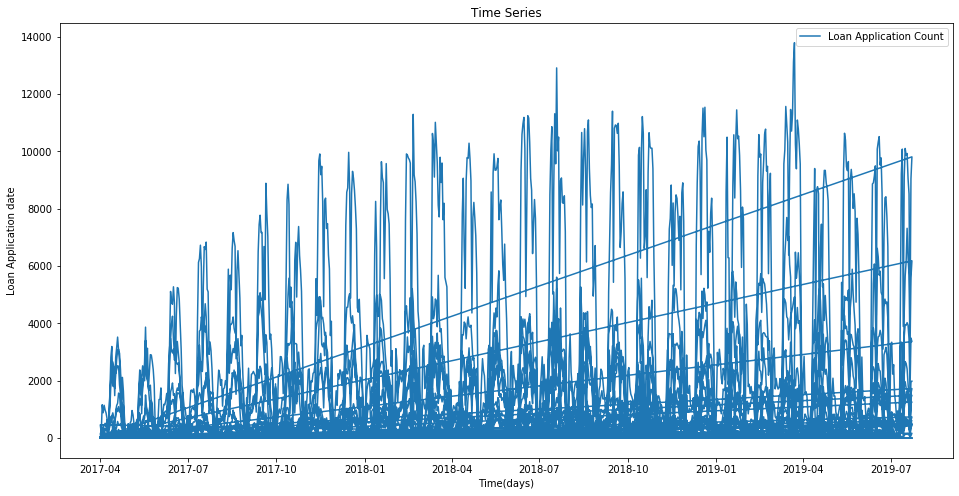

In [43]:
df = train.drop(['segment', 'branch_id', 'state', 'zone', 'year', 'month', 'day', 'day_of_week'],1)
df.index = df['application_date']
ts = df['case_count']
plt.figure(figsize = (16,8))
plt.plot(ts, label = "Loan Application Count")
plt.title('Time Series')
plt.xlabel('Time(days)')
plt.ylabel("Loan Application date")
plt.legend(loc = 'best')

In [44]:
## Split the datasets based on segments
trainSegment1 = train.loc[train['segment'] == 1]
trainSegment2 = train.loc[train['segment'] == 2]
testSegment1 = test.loc[test['segment'] == 1]
testSegment2 = test.loc[test['segment'] == 2]



In [45]:
#Remove "segment" from the above dataframes
trainSegment1 = trainSegment1.drop(['segment'], axis = 1)
trainSegment2 = trainSegment2.drop(['segment'], axis = 1)
testSegment1 = testSegment1.drop(['segment'], axis = 1)
testSegment2 = testSegment2.drop(['segment'], axis = 1)

In [53]:
trainSegment1['year'] = str(trainSegment1['year'])
trainSegment1['week_number'] = str(trainSegment1['week_number'])

In [54]:
#x = str(trainSegment1['year'])
trainSegment1['period'] = trainSegment1['year'].astype(str) + '-' + trainSegment1['week_number']

In [55]:
trainSegment1.head()

,application_date,branch_id,state,zone,case_count,year,month,day,day_of_week,week_number,period
0,2017-04-01,1.0,WEST BENGAL,EAST,40.0,0 0 2017\n1 2017\n2 ...,4,1,5,0 13\n1 14\n2 14\n3 ...,0 0 2017\n1 2017\n2 ...
1,2017-04-03,1.0,WEST BENGAL,EAST,5.0,0 0 2017\n1 2017\n2 ...,4,3,0,0 13\n1 14\n2 14\n3 ...,0 0 2017\n1 2017\n2 ...
2,2017-04-04,1.0,WEST BENGAL,EAST,4.0,0 0 2017\n1 2017\n2 ...,4,4,1,0 13\n1 14\n2 14\n3 ...,0 0 2017\n1 2017\n2 ...
3,2017-04-05,1.0,WEST BENGAL,EAST,113.0,0 0 2017\n1 2017\n2 ...,4,5,2,0 13\n1 14\n2 14\n3 ...,0 0 2017\n1 2017\n2 ...
4,2017-04-07,1.0,WEST BENGAL,EAST,76.0,0 0 2017\n1 2017\n2 ...,4,7,4,0 13\n1 14\n2 14\n3 ...,0 0 2017\n1 2017\n2 ...


In [ ]:
trainSegment1.tail()

In [ ]:
testSegment1.head()

In [ ]:
df = trainSegment1.drop(['branch_id', 'state', 'zone', 'year', 'month', 'day', 'day of week', 'day_of_week'],1)
ts = df['case_count']
plt.figure(figsize = (16,8))
plt.plot(ts, label = "Loan Application Count")
plt.title('Time Series - Segment 1')
plt.xlabel('Time(days)')
plt.ylabel("Loan Application date")
plt.legend(loc = 'best')

In [ ]:
df = trainSegment2.drop(['branch_id', 'state', 'zone', 'year', 'month', 'day', 'day of week', 'day_of_week'],1)
ts = df['case_count']
plt.figure(figsize = (16,8))
plt.plot(ts, label = "Loan Application Count")
plt.title('Time Series - Segment 2')
plt.xlabel('Time(days)')
plt.ylabel("Loan Application date")
plt.legend(loc = 'best')